### **Linear Regression**



In [ ]:
#importing necessary modules required

from sklearn.datasets import load_boston  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#loading the dataset from the sklearn datasets
df=load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
#gnerating the required  dataset from the dataframe
housing_dataset=pd.DataFrame(df.data)

In [ ]:
#getting the dataset that is created 
housing_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#giving the colums names 
housing_dataset.columns=df.feature_names

In [ ]:
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
## definig the dependent and independent features.
X=housing_dataset
Y=df.target

In [9]:
#using the train_test_split splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=32)  

In [10]:
#using the standardizaton method to do better scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
#trainig the model using the splitted 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [13]:
#calculating the mean squared error 
mse=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
print(mse)

[-25.28857626 -17.15323884 -22.1621626  -25.09809783 -24.2750182 ]


In [14]:
mean_mse=np.mean(mse)
print(mean_mse)

-22.795418745956194


In [15]:
#predicitng the values based on our model 
reg_pred=regression.predict(X_test)
print(reg_pred)

[14.99533477 28.83384129  9.45667081 22.239036   21.28752821 29.27325605
 20.75334297 25.24442317 20.64484126 20.83605539 36.17590525 20.70467393
 18.49801694 16.97363416 27.41776748 20.89702461 28.72067931 15.81375985
 22.48230679 16.20927364 19.64342955 19.08775184 40.97792299 17.59336247
 43.55249307 12.1191911  25.41194459 16.08476072 22.13023491 17.00460578
 27.88223701 26.54673897 37.21699758 20.74071593 23.0496633  23.11693393
 33.12168056 18.29301295 27.32975059 21.99276566 28.54138332 23.27759836
 23.2237398  11.74900001 36.60861667 20.25760987 20.61589713 27.10584725
 20.9978043  24.39342121 22.68249909 31.36811972 19.4637202  13.56353943
 19.48273232 21.45682504 22.57242367 16.21409647 39.13039903 17.03632028
 39.83357208 13.6272348  25.71691628 13.56305267 19.90769972 19.78492118
 25.83823399 18.17025423 19.74701712 30.37831646 27.88252437 32.91441531
 34.18618    27.36543982  1.41094253 19.65545949 14.55036269 22.6035659
 28.53142523 24.41367013 22.65258205 21.52465037 18.

In [16]:
import seaborn as sns

In [1]:
# ploting  the graph so that the variance can be noted 
sns.displot(reg_pred-Y_test,kind='kde')

SyntaxError: ignored

In [18]:
#calculating the r-square value
from sklearn.metrics import r2_score
score = r2_score(reg_pred,Y_test)


In [19]:
score


0.5460383199256489

### **Ridge & Lasso Regression**

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
ridge=Ridge()


In [24]:
ridge

Ridge()

In [29]:
#setting the paramter which we want to test in or else in simpler words we are choosing the alpha value
parameters={"alpha":[1,10,230,30,405,5,67,89,90]}
ridgecv=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')

ridgecv.fit(X_train,Y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 10, 230, 30, 405, 5, 67, 89, 90]},
             scoring='neg_mean_squared_error')

In [30]:
ridgecv.best_params_

{'alpha': 10}

In [32]:
ridgecv.best_score_

-22.66924026190029

In [35]:
ridge_pred=ridgecv.predict(X_test)
ridge_pred 

array([15.43589789, 28.61415376, 10.04397512, 22.63076712, 20.86362116,
       29.00848938, 20.00135687, 25.28093719, 20.84980698, 20.51566367,
       36.0909345 , 20.76243572, 18.7205574 , 17.71281954, 27.42827591,
       21.08161172, 28.58038013, 16.62067511, 22.38206341, 16.22670494,
       19.68999836, 19.29791258, 40.54132066, 17.49068116, 43.11197788,
       12.36835928, 25.57677397, 16.05239715, 22.21591474, 17.03386456,
       28.05965288, 26.3410246 , 36.95910466, 20.90430253, 23.21818542,
       22.93728274, 33.20092262, 18.32785045, 27.07785568, 22.71088112,
       28.44622157, 23.28238106, 23.17670412, 11.89575509, 36.25195037,
       20.5074014 , 20.92712623, 26.47037982, 21.19405028, 24.73909645,
       22.28926154, 31.05779655, 19.6906952 , 13.81150683, 19.68805194,
       21.07086575, 22.37578038, 16.58384251, 38.87306228, 16.90190095,
       39.48484419, 14.18496286, 25.37969264, 13.68381118, 19.62094179,
       20.09802588, 25.71549708, 18.04460219, 19.46659553, 30.72

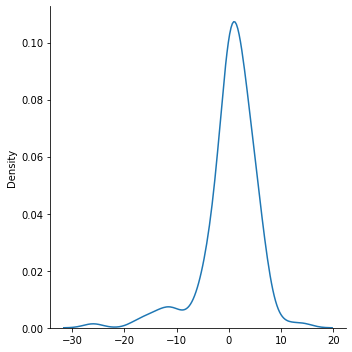

In [39]:
import seaborn as sns
sns.displot(ridge_pred-Y_test,kind="kde")

In [41]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,Y_test)

In [42]:
score

0.5235910509104473

In [43]:
from sklearn.linear_model import Lasso


In [44]:
lasso=Lasso()

In [48]:
parameter={"alpha":[10,20,30,40,50,60]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error')
lassocv.fit(X_train,Y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 10, 230, 30, 405, 5, 67, 89, 90]},
             scoring='neg_mean_squared_error')

In [51]:
#getting teh best parameters from the list  
lassocv.best_params_
#getting the score of the on the params selected
lassocv.best_score_

-27.466464650046298

In [52]:
lasso_pred=lassocv.predict(X_test)

In [53]:
lasso_pred

array([17.85997689, 28.9901642 , 12.16951063, 24.27816931, 20.57638983,
       27.04021853, 18.53894659, 25.65738855, 20.52463115, 19.34546537,
       34.28873488, 21.22828933, 19.65656675, 22.4582095 , 25.84179265,
       22.96276861, 27.77104944, 18.47724591, 23.4293323 , 14.23495703,
       20.31799128, 20.17966692, 36.1417781 , 17.64457554, 36.79220922,
       16.06530584, 26.77350501, 16.36293231, 24.21609617, 19.82309116,
       27.52257201, 23.89809429, 35.01333977, 20.4254143 , 25.28888849,
       20.42346174, 31.68308875, 19.71395091, 25.47294397, 24.93722002,
       28.0321569 , 23.87577668, 22.54744282, 14.19341206, 34.97275562,
       23.31569207, 22.66276244, 23.85632383, 20.37964673, 26.4206663 ,
       21.23276115, 28.07634413, 21.26357432, 17.1501847 , 20.64144154,
       20.59358863, 20.96575251, 17.68330957, 36.08075391, 16.74036207,
       36.48994204, 19.28884659, 24.51406657, 16.38049529, 19.69871907,
       21.63531074, 23.66842026, 18.81171637, 19.56482384, 30.20

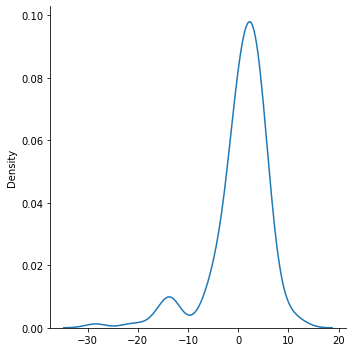

In [55]:
sns.displot(lasso_pred-Y_test,kind='kde')

In [60]:
from sklearn.metrics import r2_score
score_lasso = r2_score(lasso_pred,Y_test)

In [61]:
score_lasso

0.11187063029826949